In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

<Axes: title={'center': 'Classes'}, ylabel='count'>

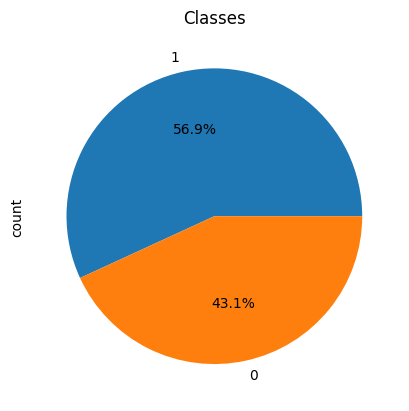

In [2]:
dfErro = pd.read_csv('dataset.csv', low_memory = False)
dfErro['classe'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Classes')

In [3]:
print(dfErro['classe'].value_counts())

classe
1    9261
0    7026
Name: count, dtype: int64


In [4]:
has_missing = dfErro.isnull().values.any()
print(f"Há valores faltantes? {has_missing}")

Há valores faltantes? True


In [5]:
dfErro.fillna(dfErro.median(numeric_only=True), inplace=True)
dfErro.to_csv("datasetTratado.csv", index=False)

Há valores faltantes? False


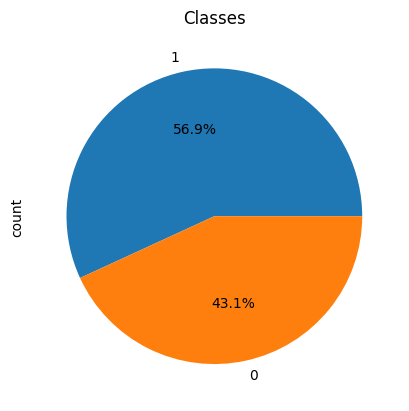

In [6]:
dfErro = pd.read_csv('datasetTratado.csv')
dfErro['classe'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Classes')

has_missing = dfErro.isnull().values.any()
print(f"Há valores faltantes? {has_missing}")

In [7]:
missing_data = dfErro.isna().sum()
missing_data_table = pd.DataFrame({'Coluna': missing_data.index, 'Dados Faltantes': missing_data.values})
missing_data_table

,Coluna,Dados Faltantes
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1206,1206,0
1207,1207,0
1208,1208,0
1209,1209,0


In [8]:
X = dfErro.drop(['classe'], axis = 1)
X = X.values
y = dfErro['classe']


In [1]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Número de componentes PCA: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
print(X_pca.shape)
print(y.shape)

(16287, 101)
(16287,)


In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1, sampling_strategy={0: 2000, 1: 2000})
X_reduzido, y_reduzido = nm.fit_resample(X_pca, y)

In [12]:
print(X_reduzido.shape)
print(y_reduzido.shape)

(4000, 101)
(4000,)


In [13]:
print(pd.Series(y_reduzido).value_counts())

classe
0    2000
1    2000
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_trainT, X_testT, y_trainT, y_testT = train_test_split(X_reduzido, y_reduzido, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_trainT, y_trainT)

feature_importances = pd.Series(clf.feature_importances_, index=[f'PC{i+1}' for i in range(X_pca.shape[1])])

top_features = feature_importances.nlargest(5)

print("Top 5 Features Mais Importantes pelo MDI:")
print(top_features)


Top 5 Features Mais Importantes pelo MDI:
PC1    0.072422
PC5    0.063906
PC2    0.056921
PC8    0.046504
PC4    0.032600
dtype: float64


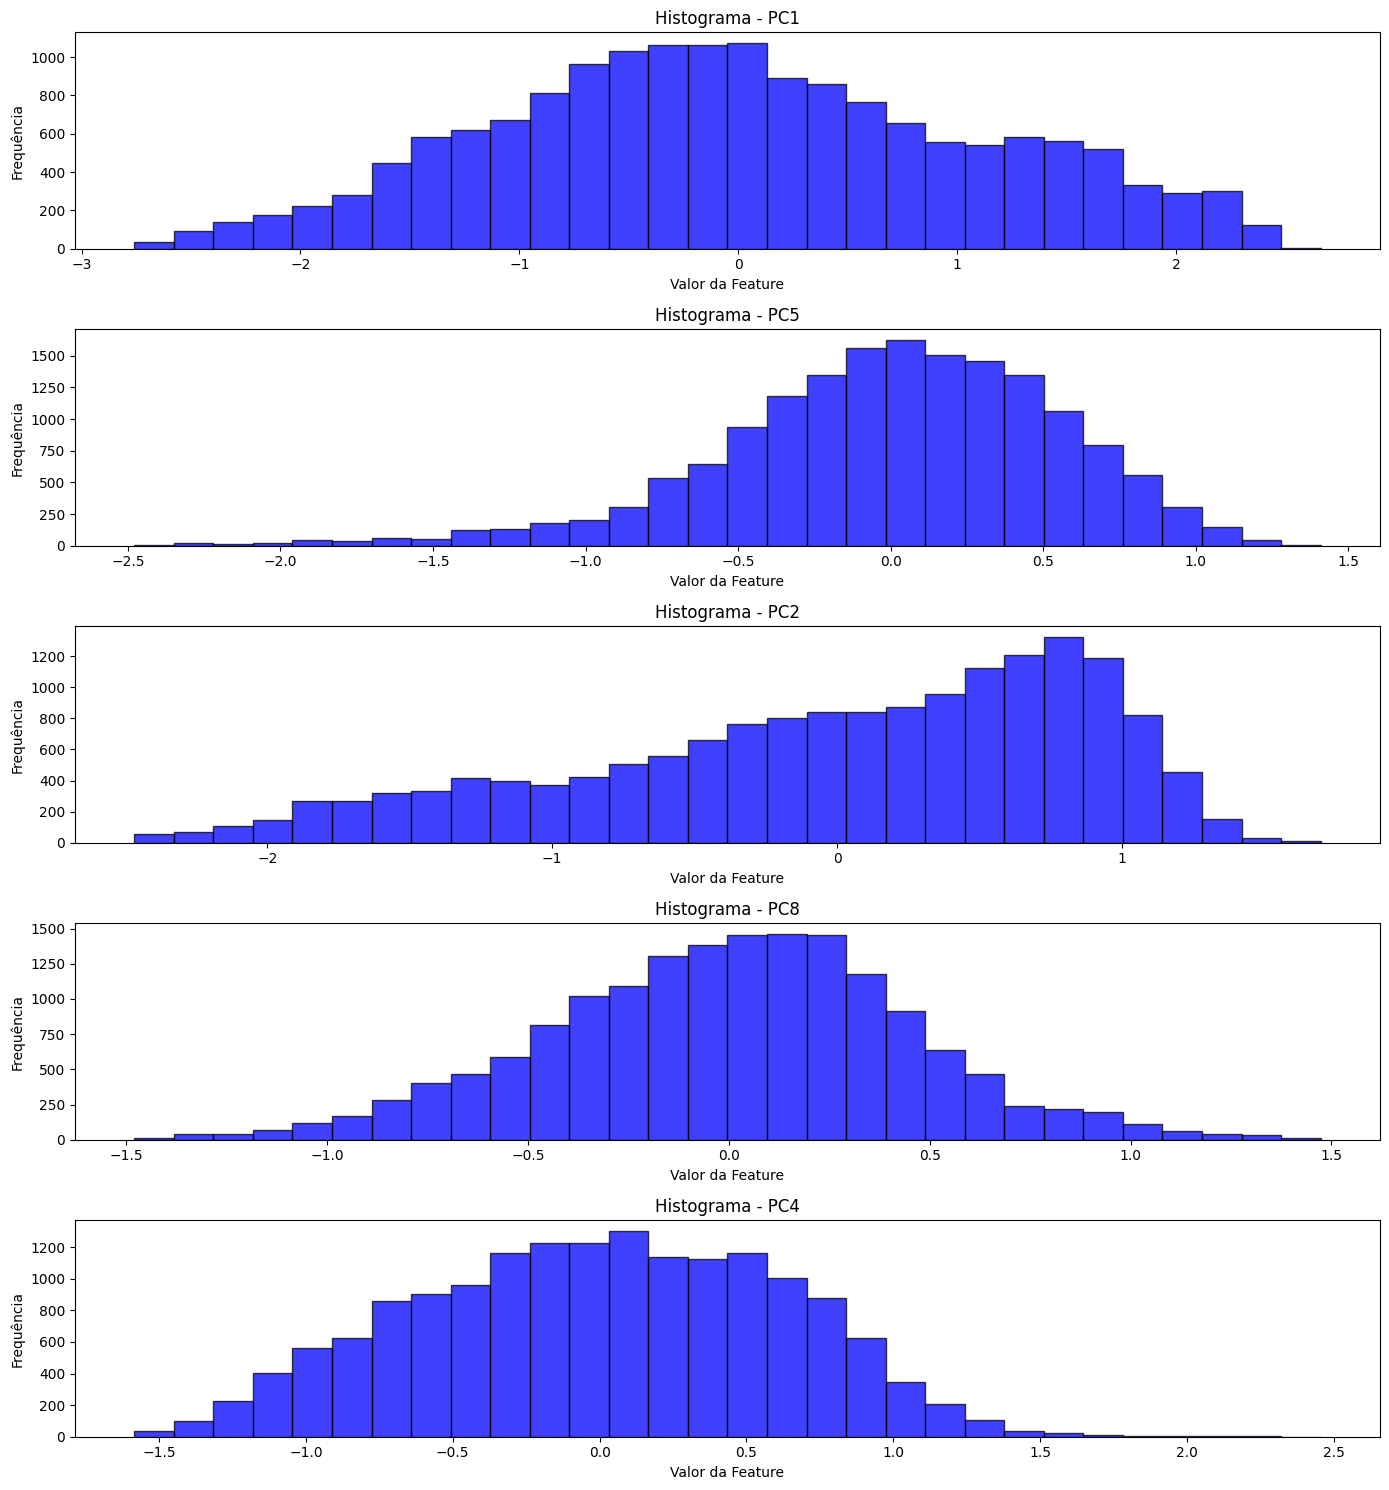

In [ ]:
import matplotlib.pyplot as plt

n_features = len(top_features)
nrows = n_features
ncols = 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3 * nrows))

if n_features == 1:
    axes = [axes]

for i, feature in enumerate(top_features.index):
    feature_idx = int(feature[2:]) - 1
    axes[i].hist(X_pca[:, feature_idx], bins=30, alpha=0.75, color='blue', edgecolor='black')
    axes[i].set_title(f'Histograma - {feature}')
    axes[i].set_xlabel('Valor da Feature')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


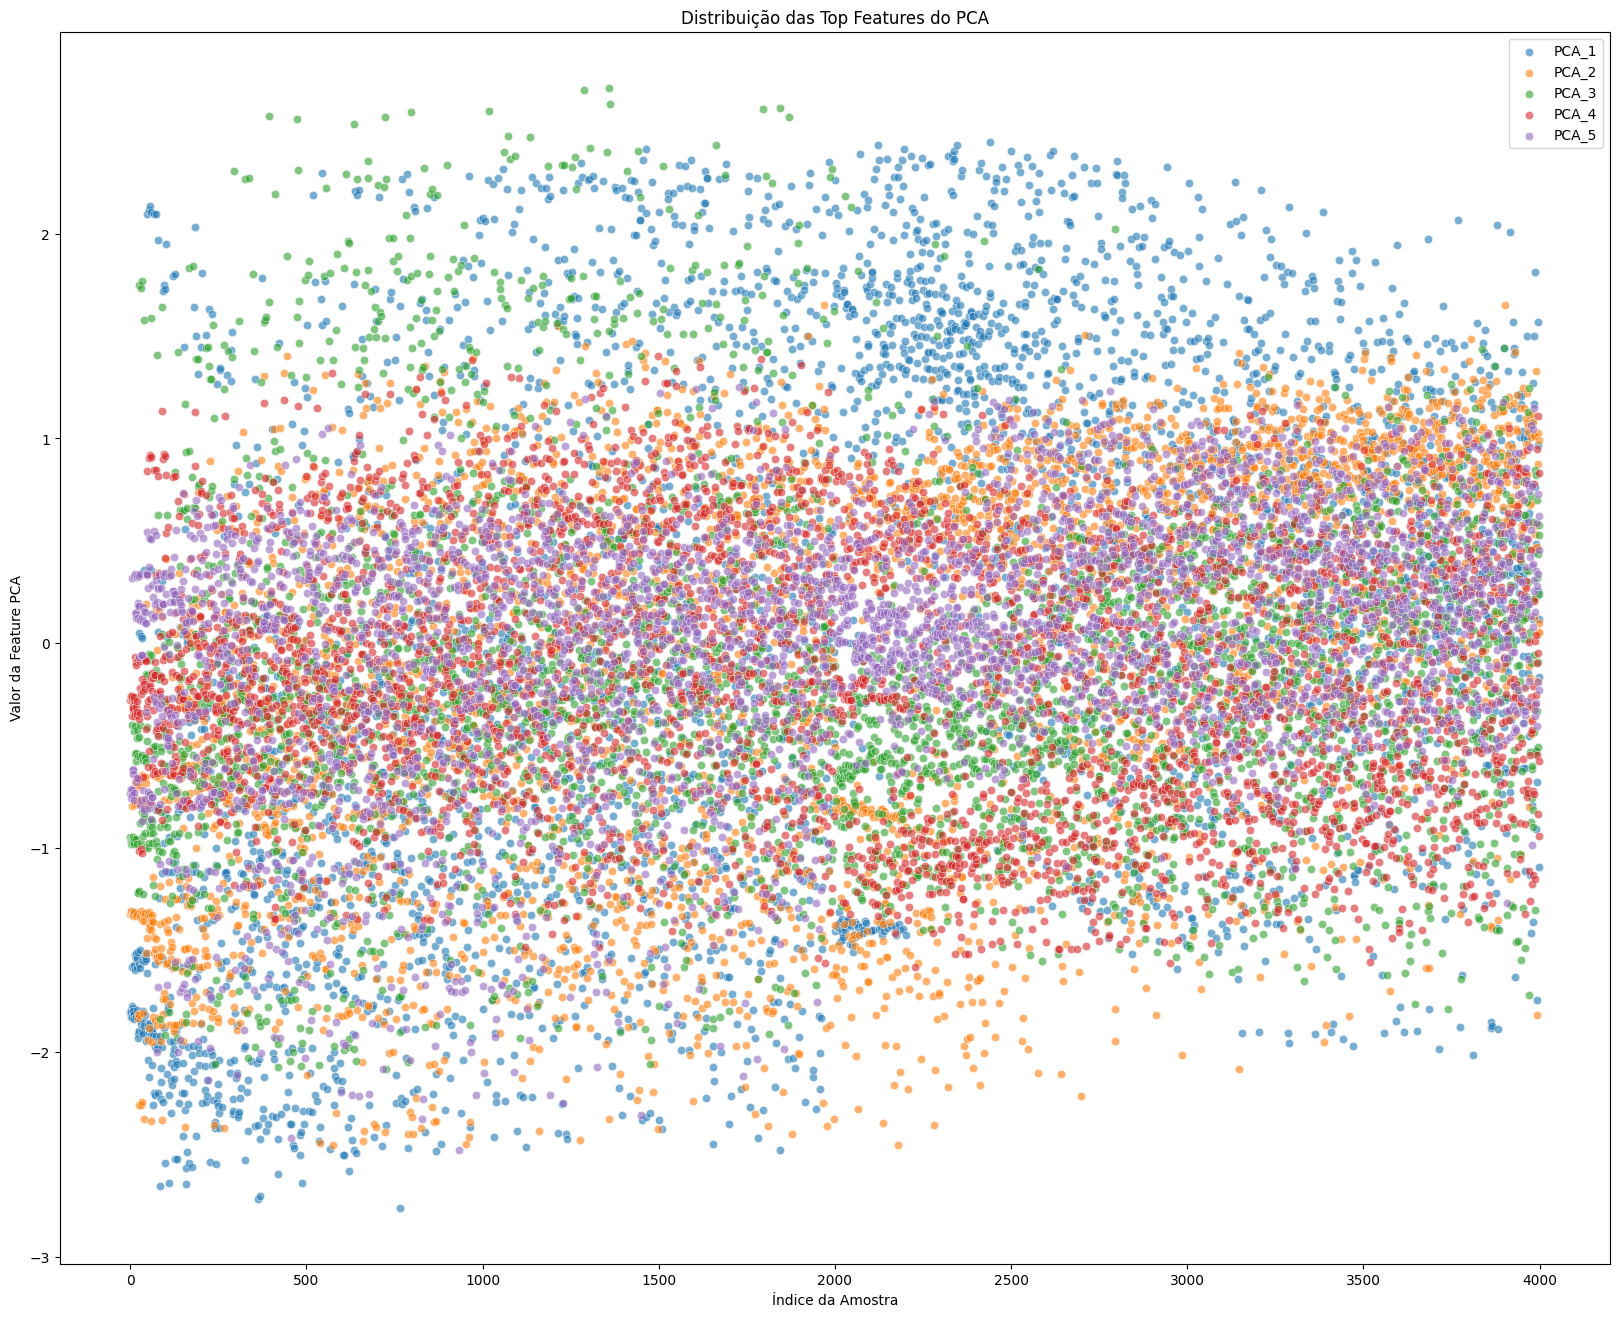

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_pca_top = pd.DataFrame(X_reduzido[:, :n_components], columns=[f"PCA_{i+1}" for i in range(n_components)])

plt.figure(figsize=(20, 16))

for feature in df_pca_top.columns[:5]:  
    sns.scatterplot(x=df_pca_top.index, y=df_pca_top[feature], label=feature, alpha=0.6)

plt.title("Distribuição das Top Features do PCA")
plt.xlabel("Índice da Amostra")
plt.ylabel("Valor da Feature PCA")
plt.legend()
plt.show()


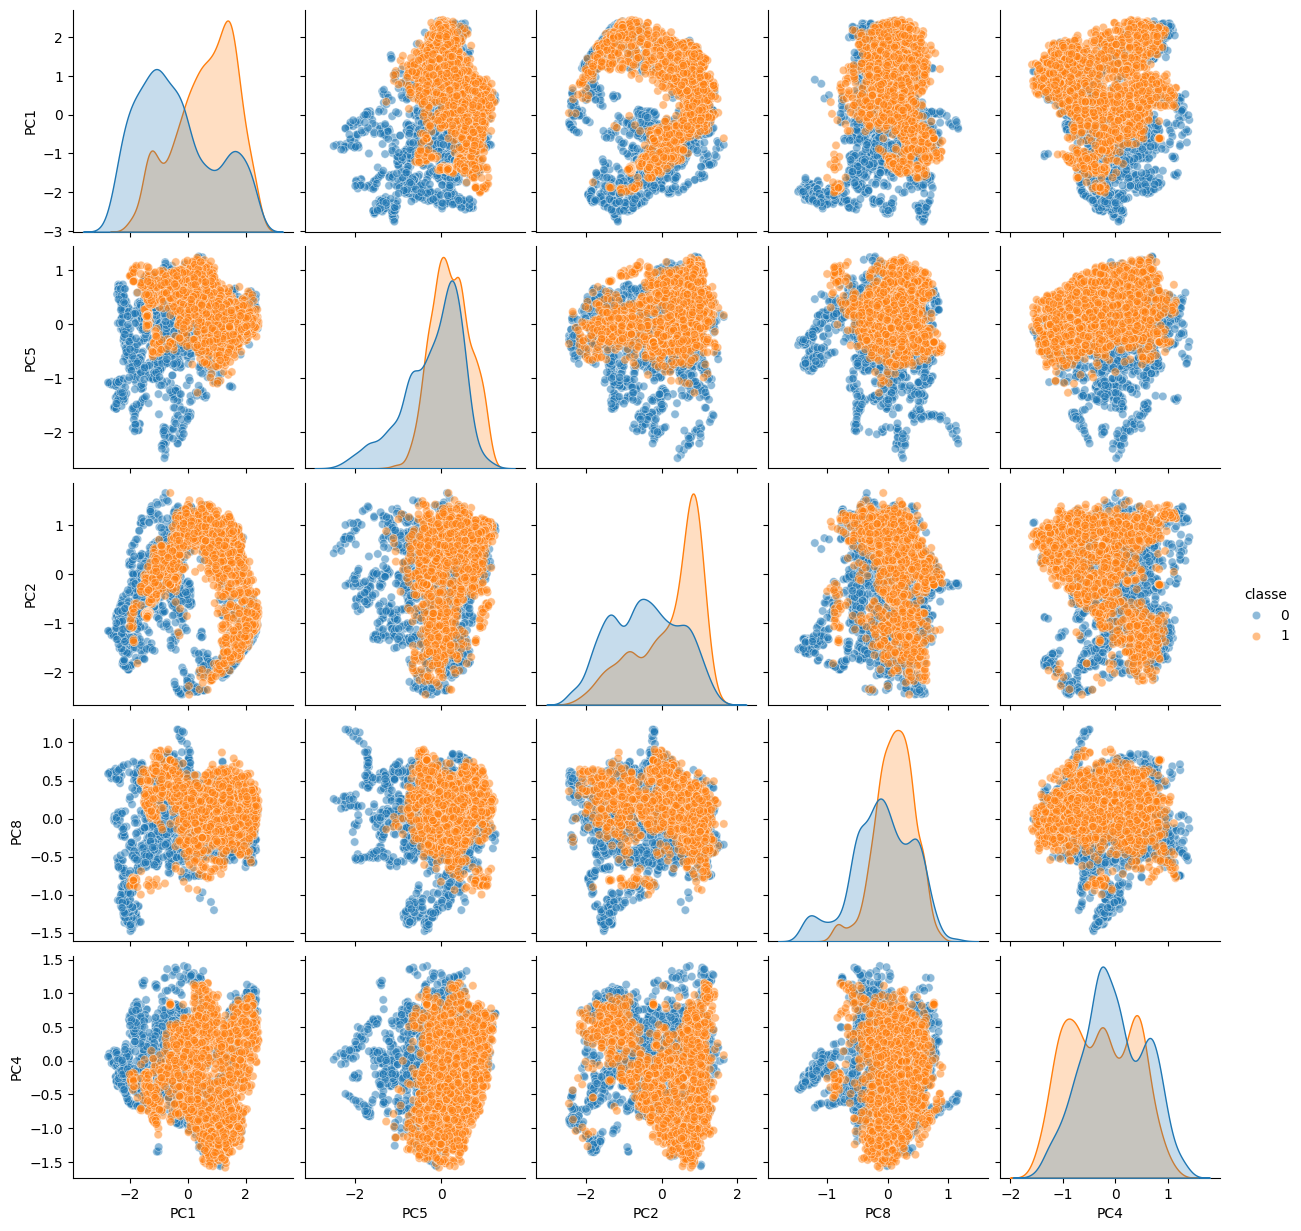

In [ ]:
df_pca_plot = pd.DataFrame(X_reduzido[:, [int(f[2:]) - 1 for f in top_features.index]], columns=top_features.index)
df_pca_plot["classe"] = y_reduzido

sns.pairplot(df_pca_plot, vars=top_features.index, hue="classe", plot_kws={'alpha': 0.5})
plt.show()


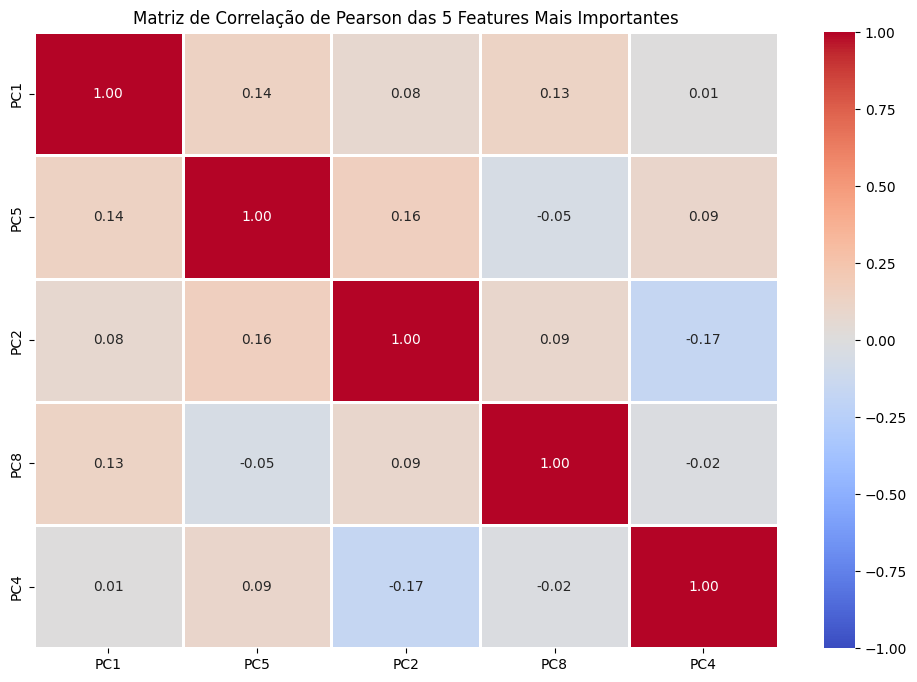

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_pca_corr = pd.DataFrame(X_reduzido[:, [int(f[2:]) - 1 for f in top_features.index]], columns=top_features.index)

correlation_matrix_top_features = df_pca_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_top_features, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, vmin=-1, vmax=1)

plt.title("Matriz de Correlação de Pearson das 5 Features Mais Importantes")
plt.show()


In [19]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle=True, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
param_grid_KNN = {'n_vizinhos': [3, 5, 7, 9, 11], 'metrica': ['euclidean', 'manhattan', 'minkowski', 'cosine']}
test_scores_KNN = []

In [21]:
from sklearn.svm import SVC

param_grid_SVM = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

test_scores_SVM = []

In [22]:
from sklearn.ensemble import RandomForestClassifier

param_grid_RF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

test_scores_RF = []

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid_GB = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],  
    'max_depth': [3, 5]
}   

test_scores_GB = []

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

fold_number = 1
with open("resultados.txt", "a") as f:
    for train_index, test_index in kfold.split(X_reduzido):
        print(f"\n===== FOLD {fold_number} =====\n")
        f.write(f"\n===== FOLD {fold_number} =====\n")
        
        X_train, X_test = X_reduzido[train_index], X_reduzido[test_index]
        y_train, y_test = y_reduzido[train_index], y_reduzido[test_index]        
            
        
        #Holdout
        X_trainDivided, X_val, y_trainDivided, y_val = train_test_split(X_train, y_train, test_size=0.2)
        
        scaler = MinMaxScaler()
        X_trainDivided = scaler.fit_transform(X_trainDivided)
        X_val = scaler.transform(X_val)

        
        # ---------- KNN ----------
        f.write("\n----- KNN -----\n")
        print("\n----- KNN -----\n")
        f1s_val_knn = []
        par_knn = []
        for params in ParameterGrid(param_grid_KNN):
            knn = KNeighborsClassifier(n_neighbors=params['n_vizinhos'], metric=params['metrica'])
            knn.fit(X_trainDivided, y_trainDivided)
            y_pred_val = knn.predict(X_val)
            
            # Calculando métricas
            f1 = f1_score(y_val, y_pred_val, average='weighted')
            f1s_val_knn.append(f1)
            par_knn.append(params)
            # Printando F1 e os parâmetros correspondentes
            print(f"F1-score: {f1:.4f}, Parâmetros: {params}")

        # Pegando os melhores parâmetros com base no F1-score
        best_knn_params = par_knn[f1s_val_knn.index(max(f1s_val_knn))]
        knn_best = KNeighborsClassifier(metric=best_knn_params['metrica'], n_neighbors=best_knn_params['n_vizinhos'])
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
              
        
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        print(f"Melhor f1 pro fold = { best_knn_params, f1s_val_knn[f1s_val_knn.index(max(f1s_val_knn))] }")
        f.write(f"Melhor f1 pro fold {fold_number} = {best_knn_params, f1s_val_knn[f1s_val_knn.index(max(f1s_val_knn))]}\n")
        
        # Calculando a matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        # Extraindo os valores TP, FP, TN, FN
        TN, FP, FN, TP = cm.ravel()
        
        f.write(f'\n********** Matriz de Confusao **********\n')
        f.write(f'Verdadeiro Positivo:  {TP}\n')
        f.write(f'Verdadeiro Negativo:  {TN}\n')
        f.write(f'Falso Positivo:  {FP}\n')
        f.write(f'Falso Negativo:  {FN}\n')
        f.write(f'***********       KNN       **********\n')

        # Calculando as métricas manualmente
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)

        f.write(f'Accuracy: {accuracy:.4f}\n')
        f.write(f'Precision: {precision:.4f}\n')
        f.write(f'Recall: {recall:.4f}\n')
        f.write(f'F1 Score: {f1:.4f}\n')
        f.write("-" * 50 + "\n\n")
        
        test_scores_KNN.append((accuracy, precision, recall, f1))  # Guardando todas as métricas


        # ---------- SVM ----------
        f.write("\n----- SVM -----\n")
        print("\n----- SVM -----\n")
        f1s_val_svm = []
        par_svm = []
        for params in ParameterGrid(param_grid_SVM):
            svm = SVC(C=params['C'], kernel=params['kernel'])
            svm.fit(X_trainDivided, y_trainDivided)
            y_pred_val = svm.predict(X_val)
            
            f1 = f1_score(y_val, y_pred_val, average='weighted')
            f1s_val_svm.append(f1)
            par_svm.append(params)
            print(f"F1-score: {f1:.4f}, Parâmetros: {params}")

        best_svm_params = par_svm[f1s_val_svm.index(max(f1s_val_svm))]
        svm_best = SVC(C=best_svm_params['C'], kernel=best_svm_params['kernel'])
        svm_best.fit(X_train, y_train)
        y_pred = svm_best.predict(X_test)
        f.write(f"Melhor f1 pro fold {fold_number} = { best_svm_params, f1s_val_svm[f1s_val_svm.index(max(f1s_val_svm))] }\n")
        print(f"Melhor f1 pro fold {fold_number} = { best_svm_params, f1s_val_svm[f1s_val_svm.index(max(f1s_val_svm))] }\n")

        # Calculando a matriz de confusão
        cm = confusion_matrix(y_test, y_pred)

        # Extraindo os valores TP, FP, TN, FN
        TN, FP, FN, TP = cm.ravel()
        
        f.write(f'\n********** Matriz de Confusao **********\n')
        f.write(f'Verdadeiro Positivo:  {TP}\n')
        f.write(f'Verdadeiro Negativo:  {TN}\n')
        f.write(f'Falso Positivo:  {FP}\n')
        f.write(f'Falso Negativo:  {FN}\n')
        f.write(f'***********       SVM       **********\n')

        # Calculando as métricas manualmente
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)

        # Imprimindo os resultados
        
        f.write(f'Accuracy: {accuracy:.4f}\n')
        f.write(f'Precision: {precision:.4f}\n')
        f.write(f'Recall: {recall:.4f}\n')
        f.write(f'F1 Score: {f1:.4f}\n')
        f.write("-" * 50 + "\n\n")

        test_scores_SVM.append((accuracy, precision, recall, f1))
        
        # ---------- Random Forest ----------
        f.write("\n----- Random Forest -----\n")
        print("\n----- Random Forest -----\n")
        f1s_val_rf = []
        par_rf = []
        for params in ParameterGrid(param_grid_RF):
            rf = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
            rf.fit(X_trainDivided, y_trainDivided)
            y_pred = rf.predict(X_val)
            
            f1 = f1_score(y_val, y_pred, average='weighted')
            f1s_val_rf.append(f1)
            par_rf.append(params)
            print(f"F1-score: {f1:.4f}, Parâmetros: {params}")
        
        best_rf_params = par_rf[f1s_val_rf.index(max(f1s_val_rf))]
        rf_best = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
        rf_best.fit(X_train, y_train)
        y_pred = rf_best.predict(X_test)
        f.write(f"Melhor f1 pro fold {fold_number} = { best_rf_params, f1s_val_rf[f1s_val_rf.index(max(f1s_val_rf))] }\n")
        print(f"Melhor f1 pro fold {fold_number} = { best_rf_params, f1s_val_rf[f1s_val_rf.index(max(f1s_val_rf))] }\n")


        # Calculando a matriz de confusão
        cm = confusion_matrix(y_test, y_pred)

        # Extraindo os valores TP, FP, TN, FN
        TN, FP, FN, TP = cm.ravel()
        
        f.write(f'\n********** Matriz de Confusao **********\n')
        f.write(f'Verdadeiro Positivo:  {TP}\n')
        f.write(f'Verdadeiro Negativo:  {TN}\n')
        f.write(f'Falso Positivo:  {FP}\n')
        f.write(f'Falso Negativo:  {FN}\n')
        f.write(f'***********    Random Forest    **********\n')

        # Calculando as métricas manualmente
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)
        
        
        f.write(f'Accuracy: {accuracy:.4f}\n')
        f.write(f'Precision: {precision:.4f}\n')
        f.write(f'Recall: {recall:.4f}\n')
        f.write(f'F1 Score: {f1:.4f}\n')
        f.write("-" * 50 + "\n\n")

        test_scores_RF.append((accuracy, precision, recall, f1))
        
        # ---------- Gradient Boosting ----------
        f.write("\n----- Gradient Boosting -----\n")
        print("\n----- Gradient Boosting -----\n")
        f1s_val_gb = []
        par_gb = []
        for params in ParameterGrid(param_grid_GB):
            gb = GradientBoostingClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], learning_rate=params['learning_rate'], random_state=42)
            gb.fit(X_trainDivided, y_trainDivided)
            y_pred = gb.predict(X_val)
            
            f1 = f1_score(y_val, y_pred, average='weighted')
            f1s_val_gb.append(f1)
            par_gb.append(params)
            print(f"F1-score: {f1:.4f}, Parâmetros: {params}")

        # Pegando os melhores parâmetros
        best_gb_params = par_gb[f1s_val_gb.index(max(f1s_val_gb))]
        gb_best = GradientBoostingClassifier(n_estimators=best_gb_params['n_estimators'], max_depth=best_gb_params['max_depth'], learning_rate=best_gb_params['learning_rate'], random_state=42)
        gb_best.fit(X_train, y_train)
        y_pred = gb_best.predict(X_test)
        f.write(f"Melhor f1 pro fold {fold_number} = { best_gb_params, f1s_val_gb[f1s_val_gb.index(max(f1s_val_gb))] }\n")
        print(f"Melhor f1 pro fold {fold_number} = { best_gb_params, f1s_val_gb[f1s_val_gb.index(max(f1s_val_gb))] }\n")

        # Calculando a matriz de confusão
        cm = confusion_matrix(y_test, y_pred)

        # Extraindo os valores TP, FP, TN, FN
        TN, FP, FN, TP = cm.ravel()
        
        f.write(f'\n********** Matriz de Confusao **********\n')
        f.write(f'Verdadeiro Positivo:  {TP}\n')
        f.write(f'Verdadeiro Negativo:  {TN}\n')
        f.write(f'Falso Positivo:  {FP}\n')
        f.write(f'Falso Negativo:  {FN}\n')
        f.write(f'*********** Gradient Boosting **********\n')

        # Calculando as métricas manualmente
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)

        
        f.write(f'Accuracy: {accuracy:.4f}\n')
        f.write(f'Precision: {precision:.4f}\n')
        f.write(f'Recall: {recall:.4f}\n')
        f.write(f'F1 Score: {f1:.4f}\n')
        f.write("-" * 50 + "\n\n")
        
        test_scores_GB.append((accuracy, precision, recall, f1))

        # Calculando as médias das métricas para cada modelo
        knn_avg = list(map(lambda x: sum(x)/len(x), zip(*test_scores_KNN)))
        svm_avg = list(map(lambda x: sum(x)/len(x), zip(*test_scores_SVM)))
        rf_avg = list(map(lambda x: sum(x)/len(x), zip(*test_scores_RF)))
        gb_avg = list(map(lambda x: sum(x)/len(x), zip(*test_scores_GB)))

        # Exibindo as métricas médias para cada modelo
        print("\n===== MÉTRICAS MÉDIAS POR CLASSIFICADOR =====")
        
        print(f"KNN               - Acurácia: {knn_avg[0]:.4f}, Precision: {knn_avg[1]:.4f}, Recall: {knn_avg[2]:.4f}, F1-score: {knn_avg[3]:.4f}")
        print(f"SVM               - Acurácia: {svm_avg[0]:.4f}, Precision: {svm_avg[1]:.4f}, Recall: {svm_avg[2]:.4f}, F1-score: {svm_avg[3]:.4f}")
        print(f"Random Forest     - Acurácia: {rf_avg[0]:.4f}, Precision: {rf_avg[1]:.4f}, Recall: {rf_avg[2]:.4f}, F1-score: {rf_avg[3]:.4f}")
        print(f"Gradient Boosting - Acurácia: {gb_avg[0]:.4f}, Precision: {gb_avg[1]:.4f}, Recall: {gb_avg[2]:.4f}, F1-score: {gb_avg[3]:.4f}")
        fold_number += 1
    
    


===== FOLD 1 =====


----- KNN -----

F1-score: 0.9236, Parâmetros: {'metrica': 'euclidean', 'n_vizinhos': 3}
F1-score: 0.9277, Parâmetros: {'metrica': 'euclidean', 'n_vizinhos': 5}
F1-score: 0.9165, Parâmetros: {'metrica': 'euclidean', 'n_vizinhos': 7}
F1-score: 0.9095, Parâmetros: {'metrica': 'euclidean', 'n_vizinhos': 9}
F1-score: 0.8940, Parâmetros: {'metrica': 'euclidean', 'n_vizinhos': 11}
F1-score: 0.9277, Parâmetros: {'metrica': 'manhattan', 'n_vizinhos': 3}
F1-score: 0.9263, Parâmetros: {'metrica': 'manhattan', 'n_vizinhos': 5}
F1-score: 0.9221, Parâmetros: {'metrica': 'manhattan', 'n_vizinhos': 7}
F1-score: 0.9165, Parâmetros: {'metrica': 'manhattan', 'n_vizinhos': 9}
F1-score: 0.8996, Parâmetros: {'metrica': 'manhattan', 'n_vizinhos': 11}
F1-score: 0.9236, Parâmetros: {'metrica': 'minkowski', 'n_vizinhos': 3}
F1-score: 0.9277, Parâmetros: {'metrica': 'minkowski', 'n_vizinhos': 5}
F1-score: 0.9165, Parâmetros: {'metrica': 'minkowski', 'n_vizinhos': 7}
F1-score: 0.9095, Parâm

In [25]:
from scipy.stats import wilcoxon
# Para armazenar os resultados do teste de Wilcoxon
wilcoxon_results = {}

# Extraindo todas as métricas para cada modelo
metrics = ["Acurácia", "Precisão", "Recall", "F1-score"]
models = {"KNN": test_scores_KNN, "SVM": test_scores_SVM, "RF": test_scores_RF, "GB": test_scores_GB}

# Gerando todas as comparações de modelos
model_pairs = [("KNN", "SVM"), ("KNN", "RF"), ("KNN", "GB"), 
               ("SVM", "RF"), ("SVM", "GB"), ("RF", "GB")]

# Teste de Wilcoxon para cada métrica e par de modelos
for metric_index, metric_name in enumerate(metrics):
    print(f"\nTeste de Wilcoxon para {metric_name}:\n")
    for model1, model2 in model_pairs:
        stat, p_value = wilcoxon([score[metric_index] for score in models[model1]],
                                 [score[metric_index] for score in models[model2]])
        wilcoxon_results[(model1, model2, metric_name)] = (stat, p_value)
        
        # Exibindo os resultados
        print(f"{model1} vs {model2} - Estatística: {stat:.4f}, p-valor: {p_value:.4f}")
        if p_value < 0.05:
            print("Diferença estatisticamente significativa (p < 0.05)")
        else:
            print("Sem diferença estatisticamente significativa (p >= 0.05)")


Teste de Wilcoxon para Acurácia:

KNN vs SVM - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
KNN vs RF - Estatística: 5.0000, p-valor: 0.0176
Diferença estatisticamente significativa (p < 0.05)
KNN vs GB - Estatística: 0.0000, p-valor: 0.0039
Diferença estatisticamente significativa (p < 0.05)
SVM vs RF - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
SVM vs GB - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
RF vs GB - Estatística: 9.0000, p-valor: 0.0625
Sem diferença estatisticamente significativa (p >= 0.05)

Teste de Wilcoxon para Precisão:

KNN vs SVM - Estatística: 0.0000, p-valor: 0.0020
Diferença estatisticamente significativa (p < 0.05)
KNN vs RF - Estatística: 3.0000, p-valor: 0.0098
Diferença estatisticamente significativa (p < 0.05)
KNN vs GB - Estatística: 25.0000, p-valor: 0.8457
Sem diferença estatisticamente significativa (p >= 0.05)
SVM vs RF